In [4]:
!pip install ydata-profiling

  Using cached ydata_profiling-4.6.1-py2.py3-none-any.whl (357 kB)
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Using cached phik-0.12.3-cp38-cp38-win_amd64.whl (663 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)
  Using cached pydantic-2.4.2-py3-none-any.whl (395 kB)
  Using cached dacite-1.8.1-py3-none-any.whl (14 kB)
  Using cached numba-0.58.1-cp38-cp38-win_amd64.whl (2.6 MB)
  Using cached wordcloud-1.9.2-cp38-cp38-win_amd64.whl (153 kB)
  Using cached typeguard-4.1.5-py3-none-any.whl (34 kB)
  Using cached llvmlite-0.41.1-cp38-cp38-win_amd64.whl (28.1 MB)
  Using cached annotated_types-0.6.0-py3-none-any.whl (12 kB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.38.0


ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [5]:
import numpy as np
import pandas as pd
#import pandas_profiling
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import pickle
#from pandas_profiling import ProfileReport
#from ydata_profiling import ProfileReport

In [6]:
pwd

'C:\\Users\\Vikas'

In [7]:
df = pd.read_csv("C:/Users/Vikas/Downloads/archive (6)/Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
df.describe().T # .T is for transpose to interchange header 

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [10]:
# droping the column unname
df=df.drop(columns=["Unnamed: 0"])
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [11]:
x=df.iloc[: ,0:-1]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [12]:
y=df.iloc[:, :-1]
y

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [13]:
# train test split 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)
x_train

,TV,Radio,Newspaper
140,73.4,17.0,12.9
22,13.2,15.9,49.6
9,199.8,2.6,21.2
11,214.7,24.0,4.0
131,265.2,2.9,43.0
...,...,...,...
14,204.1,32.9,46.0
75,16.9,43.7,89.4
138,43.0,25.9,20.5
165,234.5,3.4,84.8


In [15]:
x_train

,TV,Radio,Newspaper
140,73.4,17.0,12.9
22,13.2,15.9,49.6
9,199.8,2.6,21.2
11,214.7,24.0,4.0
131,265.2,2.9,43.0
...,...,...,...
14,204.1,32.9,46.0
75,16.9,43.7,89.4
138,43.0,25.9,20.5
165,234.5,3.4,84.8


In [16]:
x_train=x_train.astype(int) 
y_train=y_train.astype(int)
x_test=x_test.astype(int)
y_test=y_test.astype(int)

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train.scaler=sc.fit_transform(x_train)
x_test.scaler=sc.fit_transform(x_test)

C:\Users\Vikas\AppData\Local\Temp\ipykernel_10252\2151227498.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  x_train.scaler=sc.fit_transform(x_train)
C:\Users\Vikas\AppData\Local\Temp\ipykernel_10252\2151227498.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  x_test.scaler=sc.fit_transform(x_test)


# Apply Linear regression 

In [20]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [22]:
lr.fit(x_train.scaler,y_train)

LinearRegression()

In [23]:
y_pred=lr.predict(x_test.scaler)

# Evaluate the performance of regression model 

In [25]:
from sklearn.metrics import r2_score


In [26]:
r2_score(y_test,y_pred)

0.946788171440308

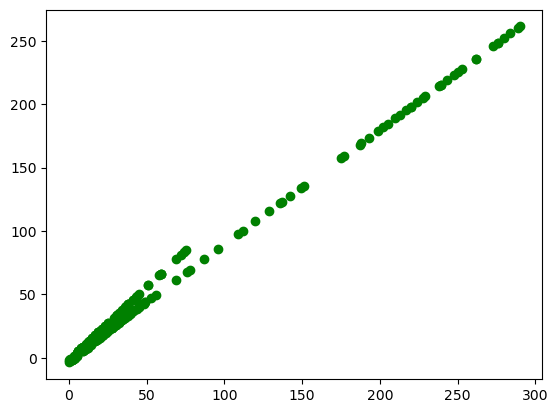

In [27]:
plt.scatter(y_test,y_pred,c="g")